In [ ]:
#pip install fireducks

In [ ]:
import fireducks.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("numeric_df.csv")
print(df.shape)
print(df.isnull().sum())
df.dropna()
df.head()

(697749, 80)
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 80, dtype: int64


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,16725,6668,6,90892975,2,0,2920.0,0.0,1460.0,1460.0,...,20,0.0,0.0,0.0,0.0,90892980.0,0.0,90892980.0,90892980.0,ddos_ack_frag
1,80,46018,6,32886,1,1,0.0,1460.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
2,63790,8008,6,51449412,2,0,2920.0,0.0,1460.0,1460.0,...,20,0.0,0.0,0.0,0.0,51449412.0,0.0,51449412.0,51449412.0,ddos_ack_frag
3,80,5806,6,46874,1,1,0.0,1460.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
4,443,51810,6,72898,6,0,253.0,0.0,222.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)
y = df['Label']
y = y.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Reduce to 50 features
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Reshape input: LSTM needs (samples, timesteps, features)
X_train_lstm = X_train_pca.reshape((X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_test_lstm = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

# Convert labels to categorical if it's a multi-class classification
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your training labels
label_encoder.fit(y_train)

# Transform both training and testing labels to numerical representations
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now use the encoded labels with to_categorical
y_train_lstm = to_categorical(y_train_encoded)
y_test_lstm = to_categorical(y_test_encoded)



In [ ]:
model = Sequential([
    LSTM(64, input_shape=(1, X_train_pca.shape[1]), activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(y_train_lstm.shape[1], activation='softmax')  # Adjust output for classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 93s 5ms/step - accuracy: 0.7331 - loss: 0.7588 - val_accuracy: 0.7548 - val_loss: 0.6604
Epoch 2/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.7615 - loss: 0.6463 - val_accuracy: 0.7628 - val_loss: 0.6443
Epoch 3/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.7665 - loss: 0.6292 - val_accuracy: 0.7678 - val_loss: 0.6328
Epoch 4/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - accuracy: 0.7704 - loss: 0.6163 - val_accuracy: 0.7712 - val_loss: 0.6231
Epoch 5/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - accuracy: 0.7716 - loss: 0.6114 - val_accuracy: 0.7727 - val_loss: 0.6138
Epoch 6/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - accuracy: 0.7732 - loss: 0.6057 - val_accuracy: 0.7713 - val_loss: 0.6119
Epoch 7/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.7755 - loss: 0.5987 - val_accuracy: 0.7727 - val_loss: 0.6082
Epoch 8/10
17444/17444 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - accurac

In [ ]:
y_pred_lstm = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred_lstm, axis=1)

4361/4361 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.60      0.52     12027
           1       1.00      0.96      0.98     73349
           2       0.98      0.97      0.97     15345
           3       0.35      0.27      0.30      6047
           4       0.30      0.48      0.37      9121
           5       0.00      0.00      0.00        95
           6       0.65      0.23      0.34      2243
           7       0.19      0.20      0.20      5167
           8       0.39      0.23      0.29      2511
           9       0.00      0.00      0.00       209
          10       0.00      0.00      0.00        49
          11       0.64      0.57      0.60     13282
          12       0.00      0.00      0.00       105

    accuracy                           0.77    139550
   macro avg       0.38      0.35      0.35    139550
weighted avg       0.79      0.77      0.78    139550



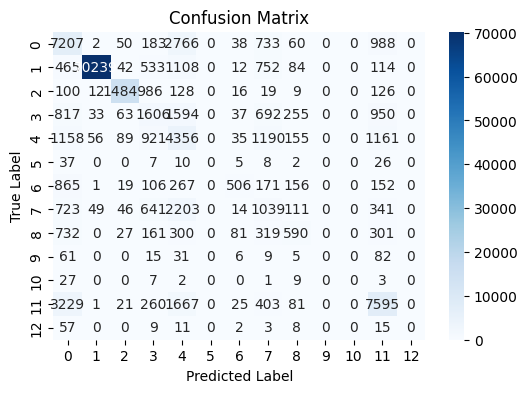

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred_lstm, axis=1)
y_test_classes = np.argmax(y_test_lstm, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Print classification report
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test_classes), yticklabels=set(y_test_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
